In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
#Downloading stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Printing stopwors to check
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
#Linking Kaggle account through API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
#Download Kaggle Data Set
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 80% 65.0M/80.9M [00:00<00:00, 146MB/s]
100% 80.9M/80.9M [00:00<00:00, 147MB/s]


In [7]:
#Unzipping Data
from zipfile import ZipFile
file_name = "/content/sentiment140.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [8]:
#Loading CSV File into Pandas Data frame
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
#Checking the Shape of the dataframe
twitter_data.shape

(1599999, 6)

In [10]:
column_names= ['target','id','date','flag','user','text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)

In [11]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
twitter_data.shape

(1600000, 6)

In [13]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
#Checking the null Values
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [15]:
#Checking the Values
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Converting 4 into 1

In [16]:
twitter_data.replace({'target' : {4:1}},inplace=True)
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

Target Interpretation

0---> Negative Tweet

1---> Positive Tweet

Reducing Data set

In [17]:
# Assuming twitter_data is a DataFrame with 'stemmed_content' and 'target' columns
negative_samples = twitter_data[twitter_data['target'] == 0].head(40000)
positive_samples = twitter_data[twitter_data['target'] == 1].head(40000)

# Combine the samples
balanced_data = pd.concat([negative_samples, positive_samples])

# Shuffle the data to ensure a random distribution of classes
balanced_data = balanced_data.sample(frac=1, random_state=2).reset_index(drop=True)

In [18]:
balanced_data.shape

(80000, 6)

In [10]:
#Performing Stemming to reduce words to its root
porterstemmer = PorterStemmer()

In [2]:

#defining Function for stemming
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Downloading stop words
nltk.download('stopwords')
#Performing Stemming to reduce words to its root
porterstemmer = PorterStemmer()
def stemming (content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [porterstemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#Applying stemming
# twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)
balanced_data['stemmed_content'] = balanced_data['text'].apply(stemming)

In [22]:
# twitter_data.head()
balanced_data.head()

,target,id,date,flag,user,text,stemmed_content
0,1,1558191327,Sun Apr 19 07:34:48 PDT 2009,NO_QUERY,lizzilla,Last day at brighton today. Looks like a blueb...,last day brighton today look like bluebird
1,1,1469011259,Tue Apr 07 04:49:50 PDT 2009,NO_QUERY,Josu3,Josu3Hello @imsondag glad to see ya here! I wi...,josu hello imsondag glad see ya follow btw nic...
2,0,1558085218,Sun Apr 19 07:12:33 PDT 2009,NO_QUERY,ceciliewehage,is not feeling very 'yummy in the tummy' today...,feel yummi tummi today rather opposit actual f...
3,0,1565467339,Mon Apr 20 06:49:39 PDT 2009,NO_QUERY,benny11k,"@Synergiance Tis too big, and mean.",synergi ti big mean
4,0,1557284928,Sun Apr 19 03:08:52 PDT 2009,NO_QUERY,quietcharm1987,@joszem I know it really sucks,joszem know realli suck


In [23]:
#Separating Data and Label
# X = twitter_data['stemmed_content'].values
# y = twitter_data['target'].values
X = balanced_data['stemmed_content'].values
y = balanced_data['target'].values

Splitting data for training and testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(80000,) (64000,) (16000,)


In [26]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [27]:
print(X_train)
print(X_test)

  (0, 35500)	0.2242655201051985
  (0, 23779)	0.2085296714428283
  (0, 41303)	0.17692117292133705
  (0, 29178)	0.2271921551084259
  (0, 24420)	0.42122584374252053
  (0, 214)	0.26837451185942635
  (0, 14888)	0.16557789953109922
  (0, 40684)	0.24886314079047775
  (0, 49954)	0.3152222160553996
  (0, 2687)	0.2537582155983607
  (0, 42932)	0.17078480234381302
  (0, 2742)	0.33784766465501553
  (0, 43896)	0.42122584374252053
  (1, 15414)	0.40774168818993767
  (1, 23095)	0.36234532896736904
  (1, 5577)	0.3513762739179452
  (1, 16764)	0.16441951969411048
  (1, 5311)	0.2778265102835372
  (1, 47243)	0.32651013745786905
  (1, 26798)	0.18022385694875123
  (1, 46239)	0.2833261916172344
  (1, 12237)	0.5053738267953272
  (2, 38572)	0.29506395137562885
  (2, 20896)	0.20987351652158018
  (2, 10252)	0.31428746568239063
  :	:
  (63997, 40136)	0.3453687961794556
  (63997, 8586)	0.33752297928169
  (63997, 47243)	0.3547419353184537
  (63998, 13674)	0.4416788218747781
  (63998, 368)	0.45436627573928184
  (63998

Training Model

In [28]:
LR = LogisticRegression(max_iter=1000)

In [29]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [30]:
#Accuracy Score on Training data
X_prediction = LR.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_prediction)


In [31]:
print('Accuracy score on Training Data', training_data_accuracy*100)

Accuracy score on Training Data 82.8703125


In [32]:
#Accuracy Score on Test data
X_prediction = LR.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_prediction)


In [33]:
print('Accuracy score on Test Data', test_data_accuracy*100)

Accuracy score on Test Data 76.30624999999999


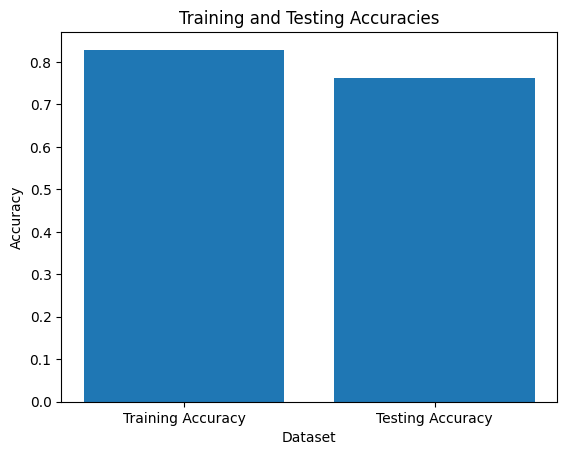

In [34]:
# Plot the accuracies
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_data_accuracy, test_data_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies')
plt.show()


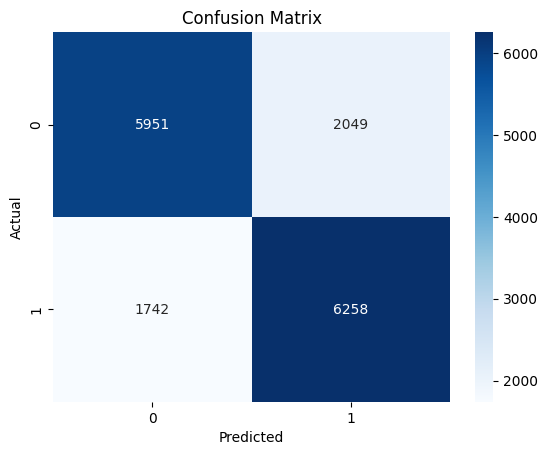

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion Matrix on Test Data
conf_matrix = confusion_matrix(y_test, X_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Saving the trained Model

In [3]:
import pickle

In [ ]:
#saving the model
file_name = '/content/drive/MyDrive/Colab Notebooks/Trained Model/Lr_trained_model.sav'
pickle.dump(LR, open(file_name, 'wb'))
#saving vectorizer
file_name = '/content/drive/MyDrive/Colab Notebooks/Trained Model/Fit_Vectorizer.sav'
pickle.dump(vectorizer, open(file_name, 'wb'))
#saving the Stemming process
file_name = '/content/drive/MyDrive/Colab Notebooks/Trained Model/De_stemming.sav'
pickle.dump(stemming, open(file_name, 'wb'))

Loading the Pre Trained model for new predictions

In [4]:
file_name = '/content/drive/MyDrive/Colab Notebooks/Trained Model/Lr_trained_model.sav'
LR_loaded_Model =pickle.load(open(file_name, 'rb'))
file_name1 = '/content/drive/MyDrive/Colab Notebooks/Trained Model/Fit_Vectorizer.sav'
loaded_vectorizer = pickle.load(open(file_name1, 'rb'))
file_name2 = '/content/drive/MyDrive/Colab Notebooks/Trained Model/De_stemming.sav'
# Loaded_stemming = pickle.load(open(file_name2, 'rb'))
loaded_stemming = pickle.load(open(file_name2, 'rb'))

In [39]:
X_new = X_test[1]

prediction = LR_loaded_Model.predict(X_new)
if (prediction[0]==0):
  print('Negative Tweet')
else:
  print('Positive Tweet')

Negative Tweet


Creating a GUI to ask the user to enter tweet to predict using the trained model

In [5]:
from types import LambdaType

import ipywidgets as widgets
from IPython.display import display

# Create text input widget for tweet
tweet_input = widgets.Text(
    value='',
    placeholder='Enter your tweet (minimum 2 words)',
    description='Tweet:',
    disabled=False,
    layout=widgets.Layout(width='auto', height='auto')
)

# Create button widget
analyze_button = widgets.Button(
    description='Analyze',
    disabled=False,
    button_style='info',
    tooltip='Analyze Tweet',
    icon='search',

)

# Create an output text area widget to display results
prediction_output = widgets.Textarea(
    value='',
    placeholder='Prediction will appear here',
    description='Prediction:',
    disabled=True,
    layout=widgets.Layout(width='auto', height='auto')  # Auto-adjust layout
)

# Create a vertical box to hold the widgets
vbox = widgets.VBox([tweet_input, analyze_button, prediction_output])

# Display the vertical box
display(vbox)

# Define function to handle button click
def on_analyze_button_clicked(b):
    tweet = tweet_input.value
    words = tweet.split()
    if len(words) < 2:
        prediction_output.value = "Please enter a tweet with at least 2 words."
        return

    # Preprocess the tweet (apply stemming)
    processed_tweet = loaded_stemming(tweet)

    # Transform the preprocessed tweet using the trained vectorizer
    transformed_tweet = loaded_vectorizer.transform([processed_tweet])

    # Make the prediction using the loaded model
    prediction = LR_loaded_Model.predict(transformed_tweet)

    # Display the result in the output widget with emoji
    if prediction[0] == 0:
        prediction_output.value = f"Tweet: '{tweet}': is predicted as Negative 😠"
    else:
        prediction_output.value = f"Tweet: '{tweet}': is predicted as Positive 😀"

# Register the callback function with the button widget
analyze_button.on_click(on_analyze_button_clicked)

SVM Modle

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy score on Test Data (SVM):', accuracy_svm * 100)

# Confusion Matrix for SVM on Test Data
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
y_pred_svm = svm_classifier.predict(X_train)
accuracy_test=accuracy_score(y_train, y_pred_svm)

In [ ]:
print('Accuracy score on Training Data (SVM):', accuracy_test * 100)

In [ ]:
print('Accuracy score on Test Data (SVM):', accuracy_svm * 100)